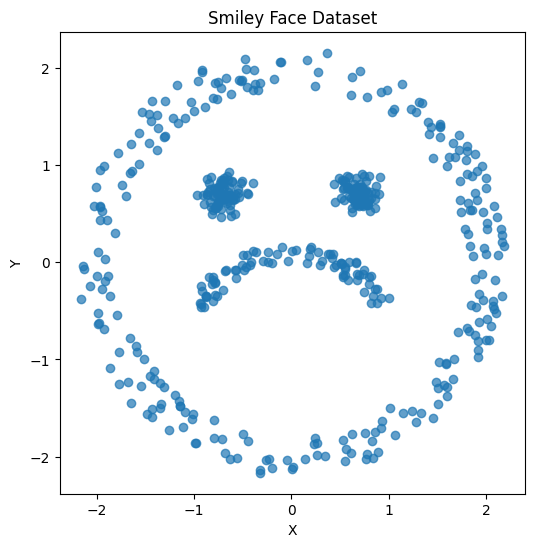

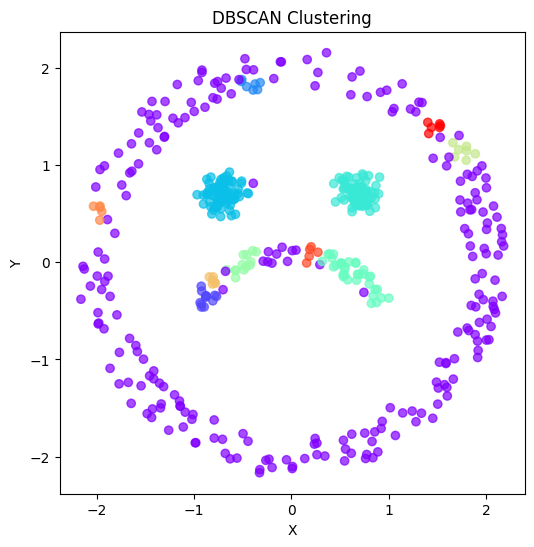

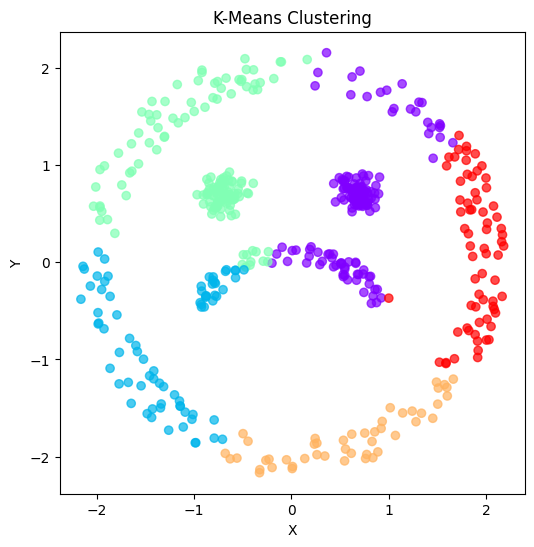

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans

# Load dataset
csv_path = "smiley_dataset.csv"
smile = pd.read_csv(csv_path)

# Visualize dataset
plt.figure(figsize=(6,6))
plt.scatter(smile['X'], smile['Y'], alpha=0.7)
plt.title('Smiley Face Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
smile['DBSCAN_Label'] = dbscan.fit_predict(smile[['X', 'Y']])

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
smile['KMeans_Label'] = kmeans.fit_predict(smile[['X', 'Y']])

# Plot DBSCAN results
plt.figure(figsize=(6,6))
plt.scatter(smile['X'], smile['Y'], c=smile['DBSCAN_Label'], cmap='rainbow', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

# Plot K-Means results
plt.figure(figsize=(6,6))
plt.scatter(smile['X'], smile['Y'], c=smile['KMeans_Label'], cmap='rainbow', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()


1. How do K-Means and DBSCAN handle the dataset differently?
K-Means:

Assumes clusters are spherical and of similar sizes.

Uses centroids to define clusters, minimizing variance within each cluster.

Struggles with irregular or non-convex shapes (like a smiley face).

Requires a predefined number of clusters (k), which may not always be optimal.

DBSCAN:

Detects clusters based on density, making it more flexible for non-uniform shapes.

Does not require the number of clusters to be predefined.

Can identify outliers (noise points) that do not belong to any cluster.

Works well with non-linear structures like the curved shape of a smile.

2. Why might DBSCAN perform better on non-linear clusters?
DBSCAN clusters data based on density rather than fixed shapes.

It can identify clusters of arbitrary shape, unlike K-Means, which assumes circular clusters.

DBSCAN ignores noise points, which helps in handling datasets with scattered points (e.g., sparse points forming a smile or eyes in the smiley dataset).

Works well when clusters have different densities, which is common in real-world datasets.

In [7]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# List of transactions (Eid Sweet Purchases)
transactions = [
    ["gulab jamun", "barfi", "jalebi"],
    ["gulab jamun", "laddu", "halwa", "kheer"],
    ["barfi", "jalebi", "laddu"],
    ["gulab jamun", "barfi", "laddu", "jalebi"],
    ["halwa", "kheer", "soan papdi"],
    ["gulab jamun", "barfi", "jalebi", "rasmalai"],
    ["barfi", "jalebi", "soan papdi", "peda"],
    ["laddu", "kheer", "barfi"],
    ["gulab jamun", "barfi", "jalebi", "rasmalai"],
    ["halwa", "soan papdi", "kheer"]
]

# Convert transactions into a format suitable for FP-Growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm
min_support = 0.3  # Experiment with different values
frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)

# Display the frequent itemsets
print("Frequent Sweet Itemsets:")
print(frequent_itemsets)


Frequent Sweet Itemsets:
    support                      itemsets
0       0.7                       (barfi)
1       0.6                      (jalebi)
2       0.5                 (gulab jamun)
3       0.4                       (laddu)
4       0.4                       (kheer)
5       0.3                       (halwa)
6       0.3                  (soan papdi)
7       0.6               (jalebi, barfi)
8       0.4         (jalebi, gulab jamun)
9       0.4          (gulab jamun, barfi)
10      0.4  (jalebi, gulab jamun, barfi)
11      0.3                (laddu, barfi)
12      0.3                (kheer, halwa)


Questions & Answers
1. What are the top frequent sweet itemsets found using FP-Growth?
The most frequent itemsets will depend on the min_support value.

If min_support = 0.3, common combinations like:

["gulab jamun", "barfi", "jalebi"]

["barfi", "jalebi"]

["halwa", "kheer"]
will likely appear frequently.

2. How can the store owner arrange sweet items together to increase Eid sales?
Place frequently bought items together to encourage bulk purchases.

Example: If "gulab jamun" and "barfi" are frequently bought together, place them in the same section.

Create combo deals: Offer discounts on sets like ["jalebi", "barfi", "laddu"].

Highlight high-demand items: Promote the most frequently bought sweets in Eid-themed packaging.

3. Experiment by changing the min_support value and observe how it affects the frequent itemsets.
Increasing min_support (e.g., 0.5) → Fewer itemsets appear, but only the most frequently bought combos remain.

Decreasing min_support (e.g., 0.2) → More itemsets appear, including rare combinations.